# K Vecinos Más Cercanos

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Paso 1: Carga de datos y exploración de su estructura

### Carga de datos

In [ ]:
url= "https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv"
total_data=pd.read_csv(url, sep=";")
total_data.to_csv("../data/raw/total_data.csv")

### Exploración de su estructura

In [12]:
print(total_data.shape)
print(total_data.info())
total_data.head()

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
sorted(total_data["quality"].unique())


[np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]

Vamos a asumir que:
- Calidad baja (0): < 5
- Calidad media (1): >=5 && <7
- Calidad alta (2): >= 7

### Creación de la target: label

In [ ]:
def label_creator(column):
    if column < 5:
        return 0
    elif column < 7:
        return 1
    else:
        return 2
    
total_data["label"] = total_data["quality"].apply(label_creator)

In [18]:
total_data["label"].value_counts().sort_index()

label
0      63
1    1319
2     217
Name: count, dtype: int64

Vemos que la calidad más habitual es la media, seguida de la alta y, por último, la baja

## Paso 2: Entrenamiento del modelo KNN

### Separación del dataset en test y train

In [27]:
X = total_data.drop(["quality","label"], axis=1)
y = total_data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9


### Escalado Min-Max

Al tener las características diferentes escalas y rango, elegimos Min-Max

In [28]:
min_max = MinMaxScaler()
min_max.fit(X_train)

with open("../models/min_max.pkl", "wb") as file:
    pickle.dump(min_max,file)

X_train_scal = min_max.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns=X_train.columns)

X_test_scal = min_max.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns=X_test.columns)

X_train_scal.to_excel("../data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_test_scal.to_excel("../data/processed/X_test_con_outliers_scal.xlsx", index = False)

X_train_scal.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,0.362832,0.390411,0.31,0.143836,0.123539,0.328358,0.265018,0.743759,0.582677,0.226994,0.492308
354,0.132743,0.061644,0.40,0.034247,0.090150,0.589552,0.561837,0.082966,0.401575,0.134969,0.538462
342,0.557522,0.184932,0.47,0.061644,0.176962,0.074627,0.028269,0.596916,0.440945,0.233129,0.215385
834,0.371681,0.386986,0.26,0.047945,0.126878,0.223881,0.060071,0.504405,0.456693,0.061350,0.153846
705,0.336283,0.626712,0.15,0.349315,0.101836,0.149254,0.169611,0.655653,0.496063,0.073620,0.230769


### Entrenamiento del modelo con k=5

In [32]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scal, y_train)
y_pred_train = knn_model.predict(X_train_scal)
y_pred_test = knn_model.predict(X_test_scal)

## Paso 3: Evaluación del rendimiento

### `accuracy_score`

In [33]:
print(f"Train: {accuracy_score(y_train, y_pred_train)}")
print(f"Test: {accuracy_score(y_test, y_pred_test)}")

Train: 0.8795934323690383
Test: 0.8375


### `confusion_matrix`

In [36]:
print(f"Train:\n{confusion_matrix(y_train, y_pred_train)}")
print(f"Test:\n{confusion_matrix(y_test, y_pred_test)}")

Train:
[[   4   47    1]
 [   3 1026   28]
 [   0   75   95]]
Test:
[[  0  11   0]
 [  1 249  12]
 [  0  28  19]]


### `classification_report`

In [37]:
print(f"Train:\n{classification_report(y_train, y_pred_train)}")
print(f"Test:\n{classification_report(y_test, y_pred_test)}")

Train:
              precision    recall  f1-score   support

           0       0.57      0.08      0.14        52
           1       0.89      0.97      0.93      1057
           2       0.77      0.56      0.65       170

    accuracy                           0.88      1279
   macro avg       0.74      0.54      0.57      1279
weighted avg       0.86      0.88      0.86      1279

Test:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.86      0.95      0.91       262
           2       0.61      0.40      0.49        47

    accuracy                           0.84       320
   macro avg       0.49      0.45      0.46       320
weighted avg       0.80      0.84      0.81       320



## Paso 4: Optimización de k

### Bucle para distintos valores de k

In [49]:
results = []

for k in range(1,31):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scal, y_train)
    y_k_pred = model.predict(X_test_scal)
    results.append(accuracy_score(y_test, y_k_pred))

results = np.array(results)
best_k_index = np.argmax(results)
best_k = best_k_index + 1
best_accuracy = results[best_k_index]

print(f"Mejor k: {best_k}")
print(f"Mejor accuracy: {best_accuracy:.4f}")


Mejor k: 3
Mejor accuracy: 0.8625


### Graficado de accuracy según k

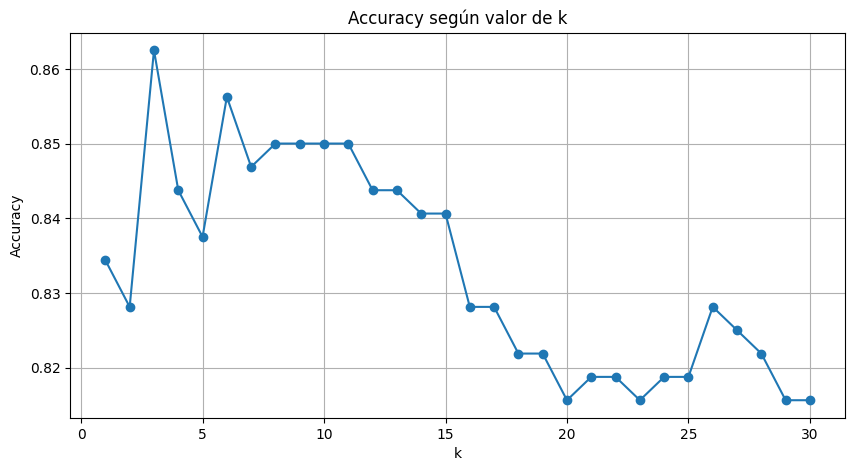

In [63]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 31), results, marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy según valor de k")
plt.grid(True)
plt.show()

Al igual que hemos observado antes, el mejor valor de k es 3

### Entrenamiento final del modelo

In [51]:
final_knn_model = KNeighborsClassifier(n_neighbors=3)
final_knn_model.fit(X_train_scal, y_train)

KNeighborsClassifier(n_neighbors=3)

### Guardado del modelo

In [52]:
with open("../models/knn_best_model_k3.pkl", "wb") as f:
    pickle.dump(final_knn_model, f)

## Función predictora de calidad del vino

In [60]:
def predict_wine_quality(nums):
    nums_scal = min_max.transform([nums])
    pred = final_knn_model.predict(nums_scal)
    if pred[0] == 0:
        return "Este vino puede que sea de calidad baja"
    elif pred[0] == 1:
        return "Este vino puede que sea de calidad media"
    else:
        return "Este vino puede que sea de calidad alta"

In [62]:
result = predict_wine_quality([7.4, 0.7, 0.0, 1.9, 0.076,11.0, 34.0, 0.9978, 3.51, 0.56, 9.4])
result

/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'Este vino puede que sea de calidad media'